**Workshop**

จงลองดึง หุ้น หรือ crypto หรือ forex สกุลเงินที่สนใจมา 1 ตัว แล้วคำนวน Moving average

SMA 50,100,200 แท่งเทียน

และ EMA 5 แท่งเทียน

## Import data

In [23]:
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

In [17]:
# define asset and date
ticker_name = 'AAPL'
start='2020-01-01' 
end='2021-12-31'

In [18]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [25]:
# create moving average
raw_df['sma_50'] = raw_df['Close'].rolling(50).mean()
raw_df['sma_100'] = raw_df['Close'].rolling(100).mean()
raw_df['sma_200'] = raw_df['Close'].rolling(200).mean()

raw_df['ema_5'] = ta.ema(raw_df['Close'], length=5)

raw_df

,Open,High,Low,Close,Adj Close,Volume,sma_50,sma_100,sma_200,ema_5
Date,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400,NaN,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846367,146322800,NaN,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426826,118387200,NaN,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081490,108872000,NaN,NaN,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257111,132079200,NaN,NaN,NaN,74.958000
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,158.865601,153.0106,142.55920,174.467836
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289459,74919600,159.597001,153.3444,142.85570,176.421891
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300,160.286001,153.6667,143.13220,177.377925


In [32]:
# creat 'added_plots' type 'dict' because we want to make an legend for visualization
added_plots = {
            'sma_50'  :    mpf.make_addplot(raw_df['sma_50'], color='blue'),
            'sma_100'  :    mpf.make_addplot(raw_df['sma_100'], color='green'),
            'sma_200'  :    mpf.make_addplot(raw_df['sma_200'], color='red'),
            'ema_5'  :   mpf.make_addplot(raw_df['ema_5'], color='black')
}

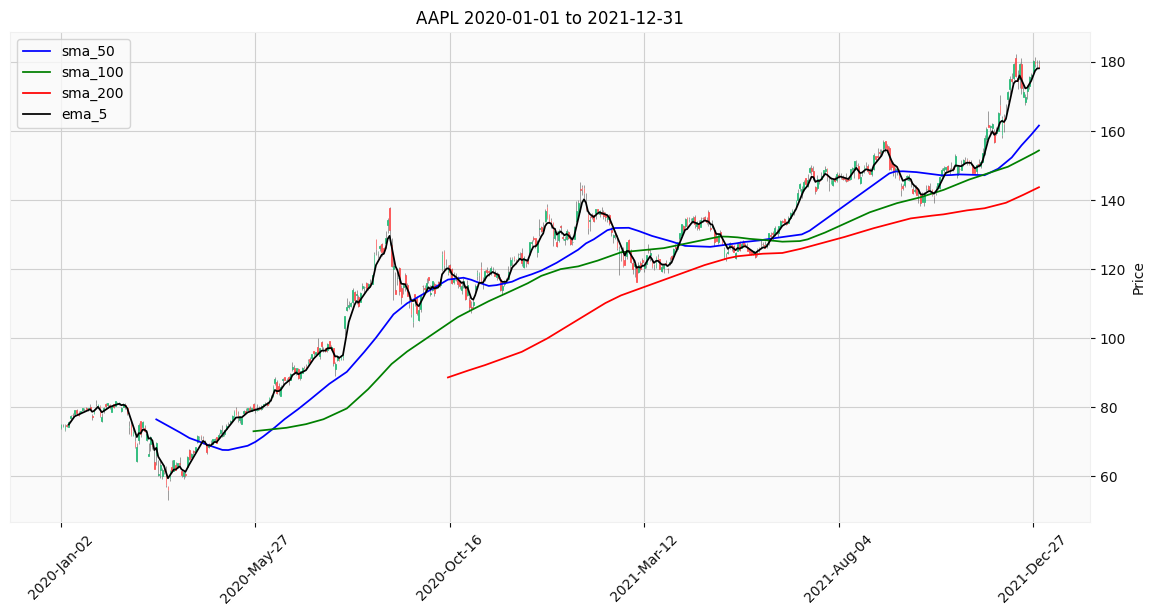

In [33]:
fig, axes = mpf.plot(   raw_df, style='yahoo', type='candle', addplot=list(added_plots.values()), figsize=(15, 7),
                        axtitle=f'{ticker_name} {start} to {end}', returnfig=True)

# added legend
axes[0].legend([None]*(len(added_plots)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:],labels=list(added_plots.keys()))